### Importing Library

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt

### Mushroom information Data

In [10]:
df = pd.read_csv('csv_result-dataset_24_mushroom.csv')
df.head()

,id,'cap-shape','cap-surface','cap-color','bruises%3F','odor','gill-attachment','gill-spacing','gill-size','gill-color',...,'stalk-color-above-ring','stalk-color-below-ring','veil-type','veil-color','ring-number','ring-type','spore-print-color','population','habitat','class'
0,1,x,s,n,t,p,f,c,n,k,...,w,w,p,w,o,p,k,s,u,p
1,2,x,s,y,t,a,f,c,b,k,...,w,w,p,w,o,p,n,n,g,e
2,3,b,s,w,t,l,f,c,b,n,...,w,w,p,w,o,p,n,n,m,e
3,4,x,y,w,t,p,f,c,n,n,...,w,w,p,w,o,p,k,s,u,p
4,5,x,s,g,f,n,f,w,b,k,...,w,w,p,w,o,e,n,a,g,e


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8127 entries, 0 to 8126
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   id                          8127 non-null   int64 
 1   'cap-shape'                 8127 non-null   object
 2   'cap-surface'               8124 non-null   object
 3   'cap-color'                 8124 non-null   object
 4   'bruises%3F'                8124 non-null   object
 5   'odor'                      8124 non-null   object
 6   'gill-attachment'           8124 non-null   object
 7   'gill-spacing'              8124 non-null   object
 8   'gill-size'                 8124 non-null   object
 9   'gill-color'                8124 non-null   object
 10  'stalk-shape'               8124 non-null   object
 11  'stalk-root'                8124 non-null   object
 12  'stalk-surface-above-ring'  8124 non-null   object
 13  'stalk-surface-below-ring'  8124 non-null   obje

### Cleaning and Normalize Data

In [12]:
# Cleaning NaN data and droping un-important column
df = df.dropna()
df = df.drop('id', axis=1)

# feature extraction
X = df.drop("'class'", axis=1)
y = df["'class'"]

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   'cap-shape'                 8124 non-null   object
 1   'cap-surface'               8124 non-null   object
 2   'cap-color'                 8124 non-null   object
 3   'bruises%3F'                8124 non-null   object
 4   'odor'                      8124 non-null   object
 5   'gill-attachment'           8124 non-null   object
 6   'gill-spacing'              8124 non-null   object
 7   'gill-size'                 8124 non-null   object
 8   'gill-color'                8124 non-null   object
 9   'stalk-shape'               8124 non-null   object
 10  'stalk-root'                8124 non-null   object
 11  'stalk-surface-above-ring'  8124 non-null   object
 12  'stalk-surface-below-ring'  8124 non-null   object
 13  'stalk-color-above-ring'    8124 non-null   obje

In [14]:
# Normalize data
le = LabelEncoder()

for i in X.columns:
    X[i] = le.fit_transform(X[i])

y = le.fit_transform(y)

### Spliting the Data

In [15]:
# seed
seed = 48

# spliting data into train(90%) and test(10%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1, random_state=seed)

### Create the Model

In [27]:
# create the model
initializer = tf.keras.initializers.RandomNormal(mean=0.0, stddev=1.0, seed=None)
model = Sequential()
model.add(Dense(120, input_dim = 22, activation='relu', kernel_initializer=initializer, bias_initializer='zeros'))
model.add(Dense(80, activation = 'relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# fit the model
model_history = model.fit(X_train, y_train, epochs=10, verbose=1)

# evaluate the training model section
score_train = model.evaluate(X_train, y_train)
print("Accuracy Training = %.2f%%" % (score_train[1]*100))

Epoch 1/10
229/229 [==============================] - 1s 3ms/step - loss: 0.3148 - accuracy: 0.9312
Epoch 2/10
229/229 [==============================] - 1s 2ms/step - loss: 0.0343 - accuracy: 0.9889
Epoch 3/10
229/229 [==============================] - 1s 2ms/step - loss: 0.0074 - accuracy: 0.9982
Epoch 4/10
229/229 [==============================] - 1s 3ms/step - loss: 0.0035 - accuracy: 0.9993
Epoch 5/10
229/229 [==============================] - 1s 3ms/step - loss: 6.2858e-04 - accuracy: 1.0000
Epoch 6/10
229/229 [==============================] - 1s 3ms/step - loss: 3.7658e-04 - accuracy: 1.0000
Epoch 7/10
229/229 [==============================] - 1s 3ms/step - loss: 1.3026e-04 - accuracy: 1.0000
Epoch 8/10
229/229 [==============================] - 1s 3ms/step - loss: 1.0862e-04 - accuracy: 1.0000
Epoch 9/10
229/229 [==============================] - 1s 3ms/step - loss: 8.6833e-05 - accuracy: 1.0000
Epoch 10/10
229/229 [==============================] - 1s 2ms/step - loss: 9.286

Text(0, 0.5, 'Loss')

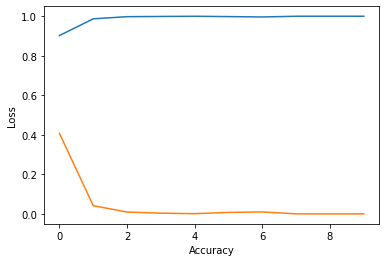

In [23]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['loss'])
plt.xlabel('Accuracy')
plt.ylabel('Loss')

In [32]:
# evaluate the testing model section
score_test =  model.evaluate(X_test, y_test)
print("Accuracy Testing = %.2f%%" % (score_test[1]*100))

26/26 [==============================] - 0s 800us/step - loss: 2.4535e-06 - accuracy: 1.0000
Accuracy Testing = 100.00%


### Ploting the Model

In [24]:
y_test_pred = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_test_pred]

Text(69.0, 0.5, 'Truth')

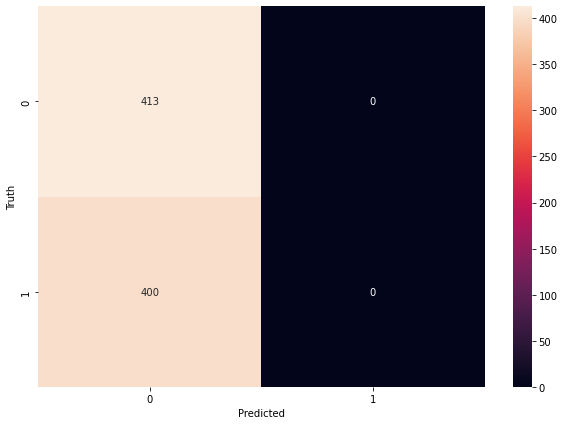

In [25]:
cm = tf.math.confusion_matrix(y_test, y_predicted_labels)

plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [46]:
y_test.shape # Total data test = 413 + 400

(813,)